# Analysis of preprocessed Video and Image Data from multiple files
Author(s): Miguel Xochicale @mxochicale    
Contributor(s): Sujon Hekim

## History
* 17th May 2023: Add prototype
* 10th Aug 2023: Adds saving dataframes in cvs files
* 26th Sep 2023: Reads data from Thu-24-Aug-2023
* 1st Oct 2023: Read pre-processed data plot data with subplots from e.g., `participant01-test01-rep02-1g-5mins_normalised_quaternions.csv`

## Summary


### How to run the notebook
1. Go to repository path: `$HOME/repositories/`
Open repo in pycharm and in the terminal type:
```
git checkout main # or the branch
git pull # to bring a local branch up-to-date with its remote version
```

2. Launch Notebook server. Go to you repository path: cd $HOME/repositories/ and type in the pycharm terminal:
```
mamba activate *VE 
jupyter notebook --browser=firefox
```
which will open your web-browser.

## References 
1. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe
2. https://github.com/YuxinZhaozyx/pytorch-VideoDataset/blob/master/datasets.py (Future work)
3. https://stackoverflow.com/questions/65446464/how-to-convert-a-video-in-numpy-array
4. https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py 
5. https://www.researchgate.net/publication/326881329_Medical_image_security_enhancement_using_two_dimensional_chaotic_mapping_optimized_by_self-adaptive_grey_wolf_algorithm 

    

## Setting imports and datasets paths

In [1]:
# from rtt4ssa.utils.utils import video_to_tensor, compute_texture_array_and_plot
# from rtt4ssa.utils.utils import data_frame_of_texture_analysis
# from rtt4ssa.utils.utils import get_and_plot_imu_data_analysis

import time
import os
import pandas as pd
import matplotlib.pyplot as plt

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/rtt4ssa'

###########################
###SETTING DATA PATHS 
# DATA_PATH='repositories/datasets/in2research2023/Thu-27-Jul-2023' 
# DATA_PATH='repositories/datasets/in2research2023/Thu-24-Aug-2023'
# FULL_REPO_DATA_PATH = HOME_PATH +'/' + DATA_PATH

PREPROCESSED_DATA_PATH='repositories/datasets/in2research2023/Thu-24-Aug-2023-preprocessed'
FULL_REPO_PREPROCESSED_DATA_PATH = HOME_PATH +'/' + PREPROCESSED_DATA_PATH +'/'
PLOTTING_FULL_REPO_PREPROCESSED_DATA_PATH=HOME_PATH+'/'+PREPROCESSED_DATA_PATH+'/plotting_data/'

## Printing Versions and paths
print(PLOTTING_FULL_REPO_PREPROCESSED_DATA_PATH)
print(f'pandas Version: {pd.__version__}')


/home/mxochicale/repositories/datasets/in2research2023/Thu-24-Aug-2023-preprocessed/plotting_data/
pandas Version: 2.0.3


In [2]:
def file_name_to_dataframe(filename):
    """
    filename: PARTICIPANT01_TEST01_REP01 = 'participant01-test01-rep01-1g-5mins_normalised_quaternions'
    returns: df_texture_analysis_pNNtNNrNN
    
    Dataframe containts: 
    Contrast_normalised
    Correlation_normalised
    Dissimilarity_normalised
    Homogeneity_normalised
    q0
    q1
    q2
    q3
    """
    CSV_FILENAME_FOR_TEXTURE_ANALYSIS_PARTICIPANTNN_TESTNN_REPNN=filename+'.csv'
    PATH_CSV = FULL_REPO_PREPROCESSED_DATA_PATH+CSV_FILENAME_FOR_TEXTURE_ANALYSIS_PARTICIPANTNN_TESTNN_REPNN
    df_texture_analysis_pNNtNNrNN = pd.read_csv(PATH_CSV)

    return df_texture_analysis_pNNtNNrNN


def plot_texture_analysis_of_dftrial01_dftrial02(dftrial01, dftrial02):
    """

    TO ADD IN UTILS on 26Sep2023
    TODO: https://seaborn.pydata.org/generated/seaborn.lineplot.html
    """
        
    fig, axs = plt.subplots(2,4, figsize=(12, 6))
    ax = plt.gca()
    
    dftrial01.plot(x='frame_i', y='Contrast_normalised', ax=axs[0,0])
    dftrial02.plot(x='frame_i', y='Contrast_normalised', ax=axs[0,0])
    axs[0,0].set_ylabel('Contrast_normalised')
    axs[0,0].legend(["trial 01", "trial02"])
    
    dftrial01.plot(x='frame_i', y='Correlation_normalised', ax=axs[0,1])
    dftrial02.plot(x='frame_i', y='Correlation_normalised', ax=axs[0,1])
    axs[0,1].set_ylabel('Correlation_normalised')
    axs[0,1].legend(["trial 01", "trial02"])
    
    dftrial01.plot(x='frame_i', y='Dissimilarity_normalised', ax=axs[0,2])
    dftrial02.plot(x='frame_i', y='Dissimilarity_normalised', ax=axs[0,2])
    axs[0,2].set_ylabel('Dissimilarity_normalised')
    axs[0,2].legend(["trial 01", "trial02"])
    
    dftrial01.plot(x='frame_i', y='Homogeneity_normalised', ax=axs[0,3])
    dftrial02.plot(x='frame_i', y='Homogeneity_normalised', ax=axs[0,3])
    axs[0,3].set_ylabel('Homogeneity_normalised')
    axs[0,3].legend(["trial 01", "trial02"])
    # axs[1,1].set_ylim((-5,5)) 
    
    dftrial01.plot(x='frame_i', y='q0', ax=axs[1,0])
    dftrial02.plot(x='frame_i', y='q0', ax=axs[1,0])
    axs[1,0].set_ylabel('q0')
    axs[1,0].legend(["trial 01", "trial02"])
    
    dftrial01.plot(x='frame_i', y='q1', ax=axs[1,1])
    dftrial02.plot(x='frame_i', y='q1', ax=axs[1,1])
    axs[1,1].set_ylabel('q1')
    axs[1,1].legend(["trial 01", "trial02"])
    
    dftrial01.plot(x='frame_i', y='q2', ax=axs[1,2])
    dftrial02.plot(x='frame_i', y='q2', ax=axs[1,2])
    axs[1,2].set_ylabel('q2')
    axs[1,2].legend(["trial 01", "trial02"])
    
    dftrial01.plot(x='frame_i', y='q3', ax=axs[1,3])
    dftrial02.plot(x='frame_i', y='q3', ax=axs[1,3])
    axs[1,3].set_ylabel('q3')
    axs[1,3].legend(["trial 01", "trial02"])
    
    plt.show()


    

# Reading csv files

In [3]:
start_time = time.time()

### PARTICIPANT01

PARTICIPANT01_TEST01_REP01 = 'participant01-test01-rep01-1g-5mins_normalised_quaternions'
df_texture_analysis_p01t01r01 = file_name_to_dataframe(PARTICIPANT01_TEST01_REP01)

PARTICIPANT01_TEST01_REP02 = 'participant01-test01-rep02-1g-5mins_normalised_quaternions'
df_texture_analysis_p01t01r02 = file_name_to_dataframe(PARTICIPANT01_TEST01_REP02)

PARTICIPANT01_TEST02_REP01 = 'participant01-test02-rep01-1g-5mins_normalised_quaternions'
df_texture_analysis_p01t02r01 = file_name_to_dataframe(PARTICIPANT01_TEST02_REP01)

PARTICIPANT01_TEST02_REP02 = 'participant01-test02-rep02-1g-5mins_normalised_quaternions'
df_texture_analysis_p01t02r02 = file_name_to_dataframe(PARTICIPANT01_TEST02_REP02)

PARTICIPANT01_TEST03_REP01 = 'participant01-test03-rep01-1g-5mins_normalised_quaternions'
df_texture_analysis_p01t03r01 = file_name_to_dataframe(PARTICIPANT01_TEST03_REP01)

PARTICIPANT01_TEST03_REP02 = 'participant01-test03-rep02-1g-5mins_normalised_quaternions'
df_texture_analysis_p01t03r02 = file_name_to_dataframe(PARTICIPANT01_TEST03_REP02)


### PARTICIPANT02

PARTICIPANT02_TEST01_REP01 = 'participant02-test01-rep01-1g-5mins_normalised_quaternions'
df_texture_analysis_p02t01r01 = file_name_to_dataframe(PARTICIPANT02_TEST01_REP01)

PARTICIPANT02_TEST01_REP02 = 'participant02-test01-rep02-1g-5mins_normalised_quaternions'
df_texture_analysis_p02t01r02 = file_name_to_dataframe(PARTICIPANT02_TEST01_REP02)


PARTICIPANT02_TEST02_REP01 = 'participant02-test02-rep01-1g-5mins_normalised_quaternions'
df_texture_analysis_p02t02r01 = file_name_to_dataframe(PARTICIPANT02_TEST02_REP01)

PARTICIPANT02_TEST02_REP02 = 'participant02-test02-rep02-1g-5mins_normalised_quaternions'
df_texture_analysis_p02t02r02 = file_name_to_dataframe(PARTICIPANT02_TEST02_REP02)


PARTICIPANT02_TEST03_REP01 = 'participant02-test03-rep01-1g-5mins_normalised_quaternions'
df_texture_analysis_p02t03r01 = file_name_to_dataframe(PARTICIPANT02_TEST03_REP01)

PARTICIPANT02_TEST03_REP02 = 'participant02-test03-rep02-1g-5mins_normalised_quaternions'
df_texture_analysis_p02t03r02 = file_name_to_dataframe(PARTICIPANT02_TEST03_REP02)


end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds ")

Execution time: 1.1475250720977783 seconds 


# Plotting texture analysis of all frames in the video

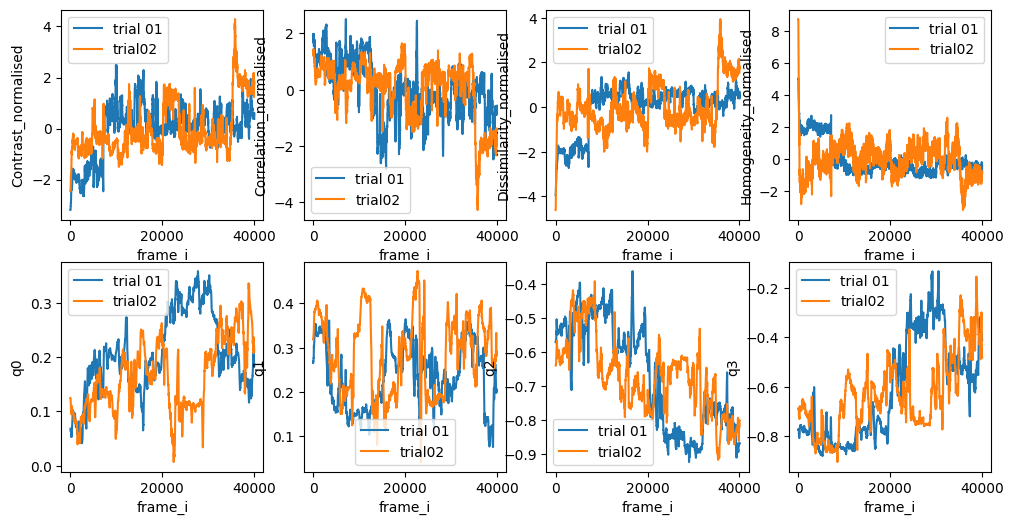

In [4]:
plot_texture_analysis_of_dftrial01_dftrial02(df_texture_analysis_p01t01r01, df_texture_analysis_p01t01r02)


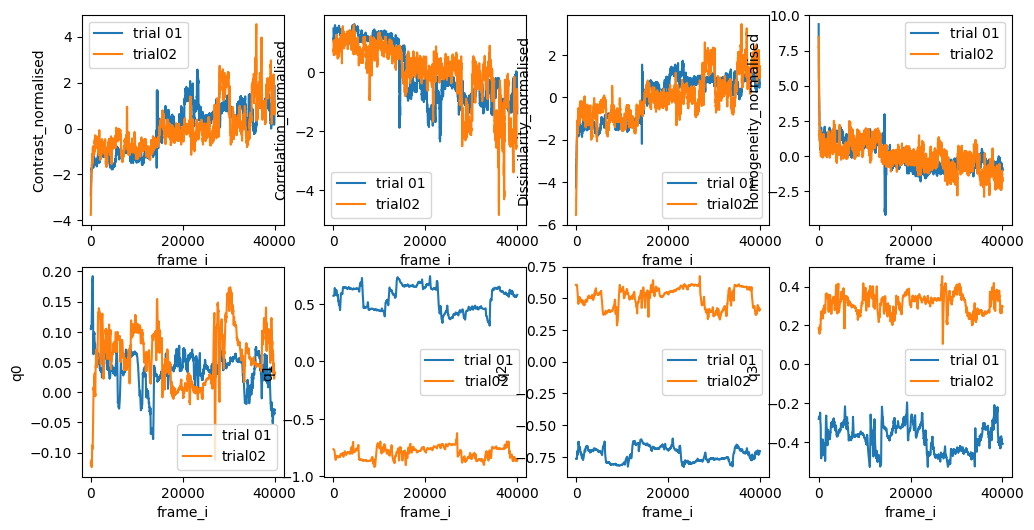

In [5]:
plot_texture_analysis_of_dftrial01_dftrial02(df_texture_analysis_p02t01r01, df_texture_analysis_p02t01r02)


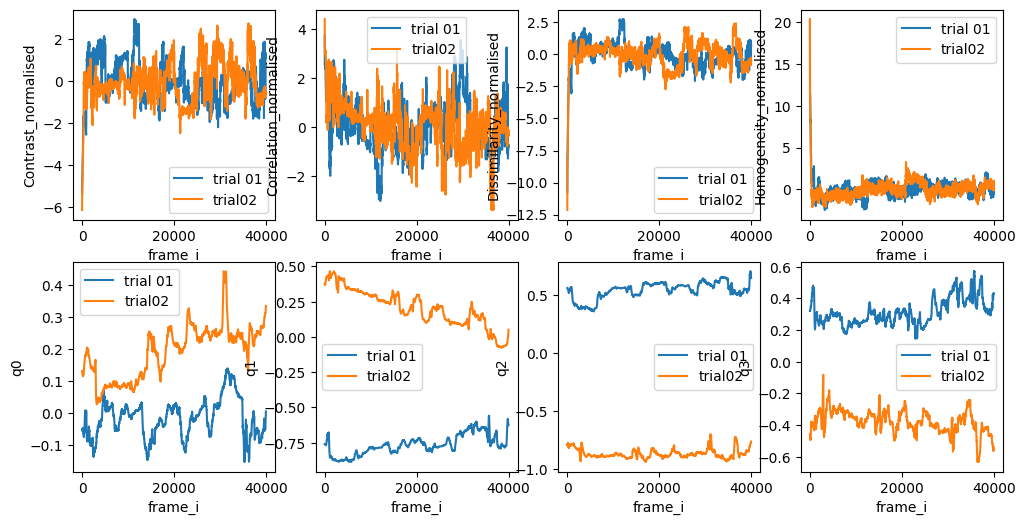

In [6]:
plot_texture_analysis_of_dftrial01_dftrial02(df_texture_analysis_p01t02r01, df_texture_analysis_p01t02r02)


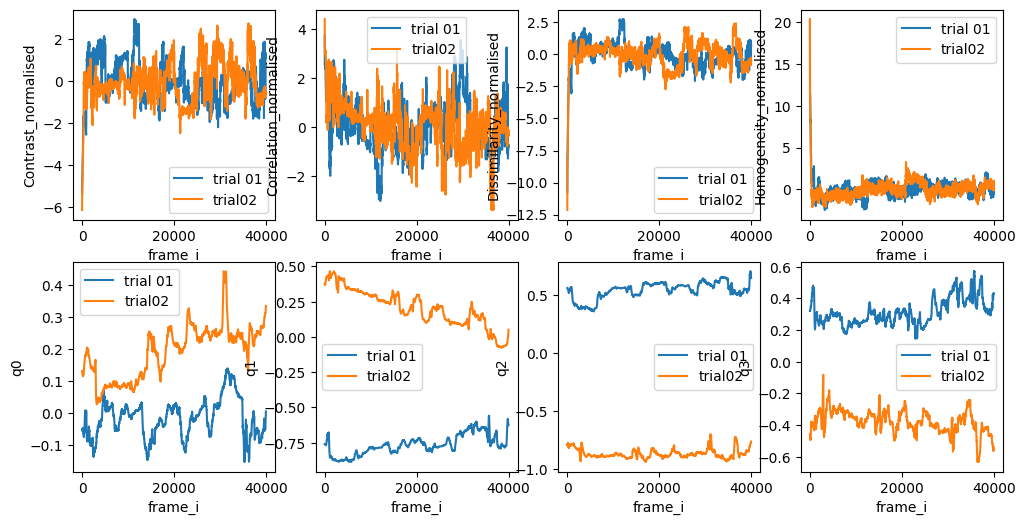

In [7]:
plot_texture_analysis_of_dftrial01_dftrial02(df_texture_analysis_p01t02r01, df_texture_analysis_p01t02r02)


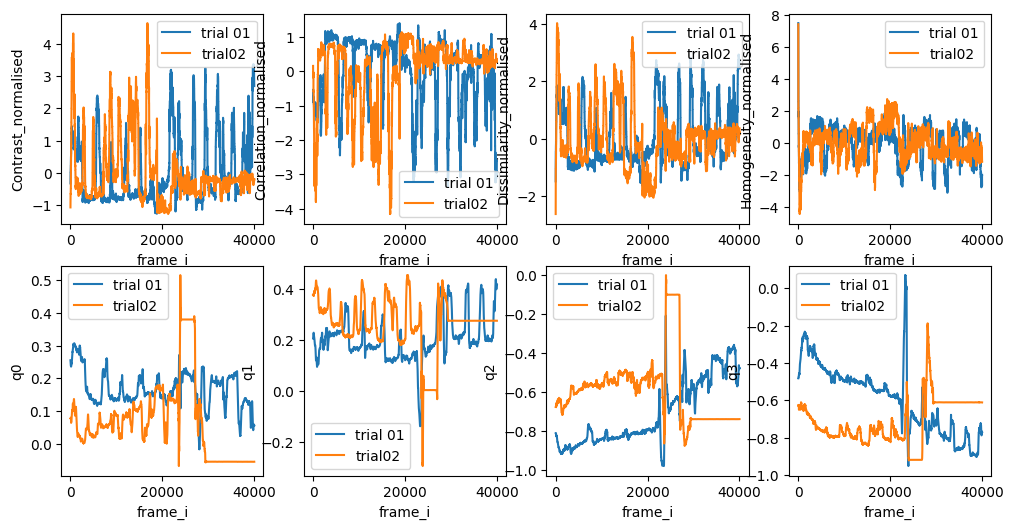

In [8]:
plot_texture_analysis_of_dftrial01_dftrial02(df_texture_analysis_p01t03r01, df_texture_analysis_p01t03r02)


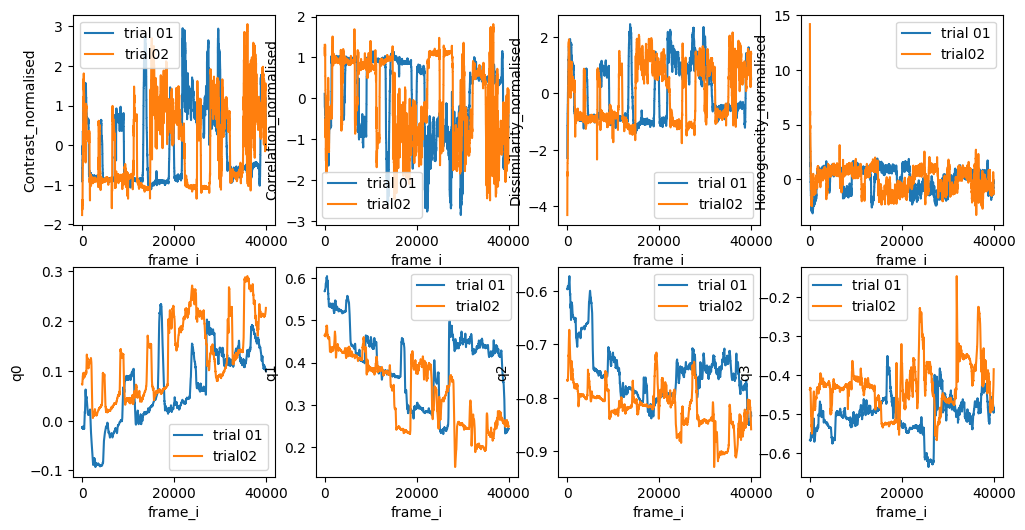

In [9]:
plot_texture_analysis_of_dftrial01_dftrial02(df_texture_analysis_p02t03r01, df_texture_analysis_p02t03r02)
